In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original_device_heart_rate_path = 'result_from_original_device.csv'
reference_device_heart_rate_path = 'result_from_reference_device.csv'

original_device_heart_rate = pd.read_csv(original_device_heart_rate_path, header = None)
reference_device_heart_rate = pd.read_csv(reference_device_heart_rate_path, header = None)

original_device_heart_rate_column = original_device_heart_rate.iloc[:, 0].values
reference_device_heart_rate_column = reference_device_heart_rate.iloc[:, 0].values

if len(original_device_heart_rate_column) != len(reference_device_heart_rate_column):
    raise ValueError("The two arrays do not have the same length!")

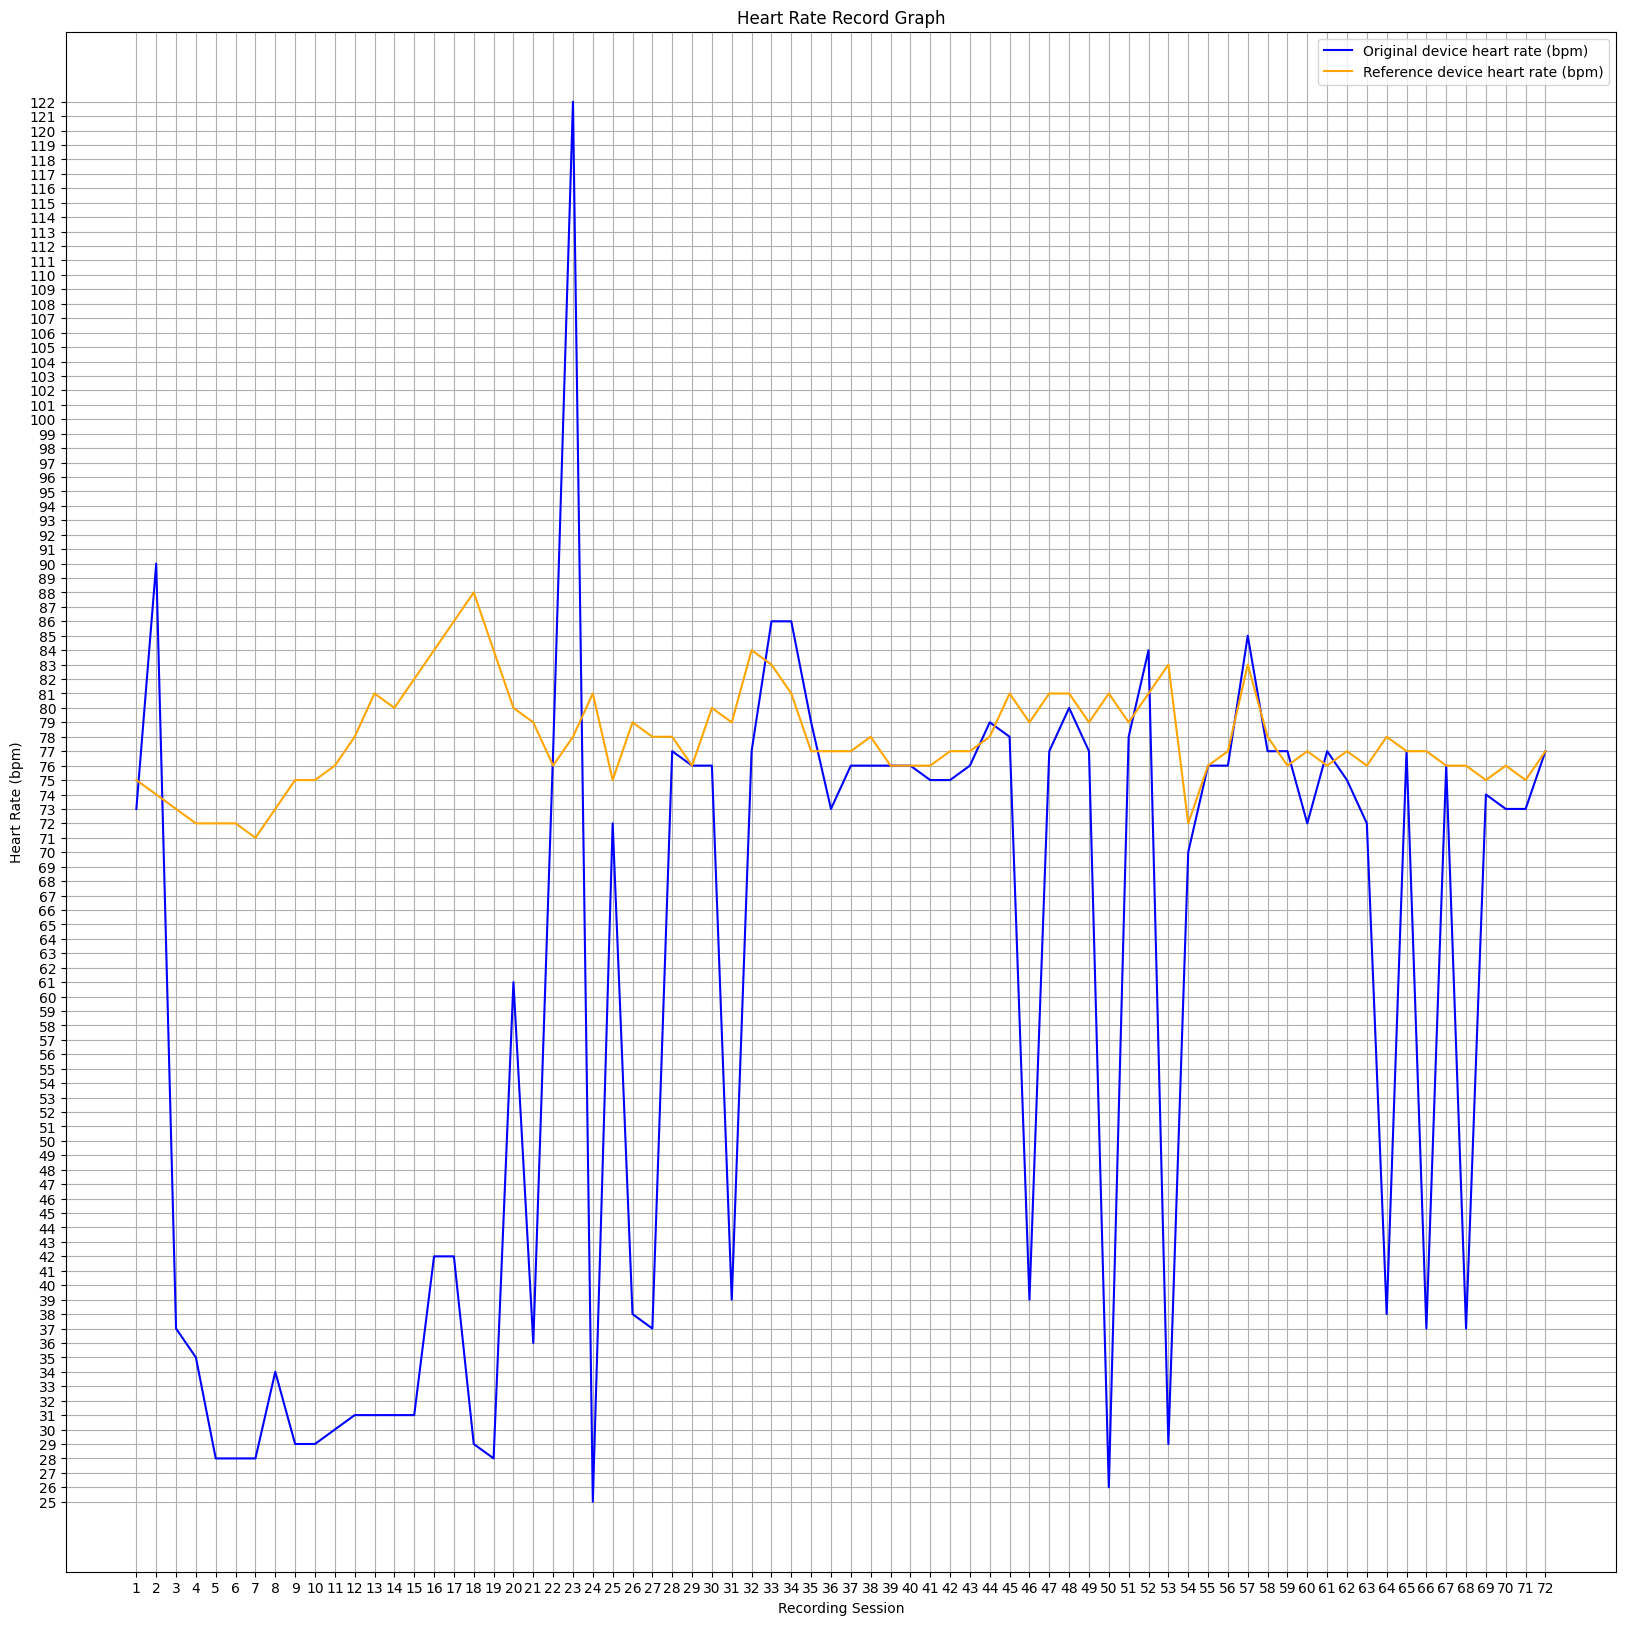

In [9]:
plt.figure(figsize = (20, 20))
plt.plot(original_device_heart_rate_column, label = 'Original device heart rate (bpm)', color = 'blue')
plt.plot(reference_device_heart_rate_column, label = 'Reference device heart rate (bpm)', color = 'orange')
plt.title('Heart Rate Record Graph')
plt.xlabel('Recording Session')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid()

num_sessions = len(original_device_heart_rate_column)
plt.xticks(ticks = np.arange(num_sessions), labels = np.arange(1, num_sessions + 1))

y_ticks = np.arange(min(min(original_device_heart_rate_column), min(reference_device_heart_rate_column)),
                     max(max(original_device_heart_rate_column), max(reference_device_heart_rate_column)) + 1, 1)
plt.yticks(y_ticks)

plt.show()

19.805555555555557
[ 2.66666667 21.62162162 49.31506849 51.38888889 61.11111111 61.11111111
 60.56338028 53.42465753 61.33333333 61.33333333 60.52631579 60.25641026
 61.72839506 61.25       62.19512195 50.         51.1627907  67.04545455
 66.66666667 23.75       54.43037975  1.31578947 56.41025641 69.13580247
  4.         51.89873418 52.56410256  1.28205128  0.          5.
 50.63291139  8.33333333  3.61445783  6.17283951  2.5974026   5.19480519
  1.2987013   2.56410256  0.          0.          1.31578947  2.5974026
  1.2987013   1.28205128  3.7037037  50.63291139  4.9382716   1.2345679
  2.53164557 67.90123457  1.26582278  3.7037037  65.06024096  2.77777778
  0.          1.2987013   2.40963855  1.28205128  1.31578947  6.49350649
  1.31578947  2.5974026   5.26315789 51.28205128  0.         51.94805195
  0.         51.31578947  1.33333333  3.94736842  2.66666667  0.        ]


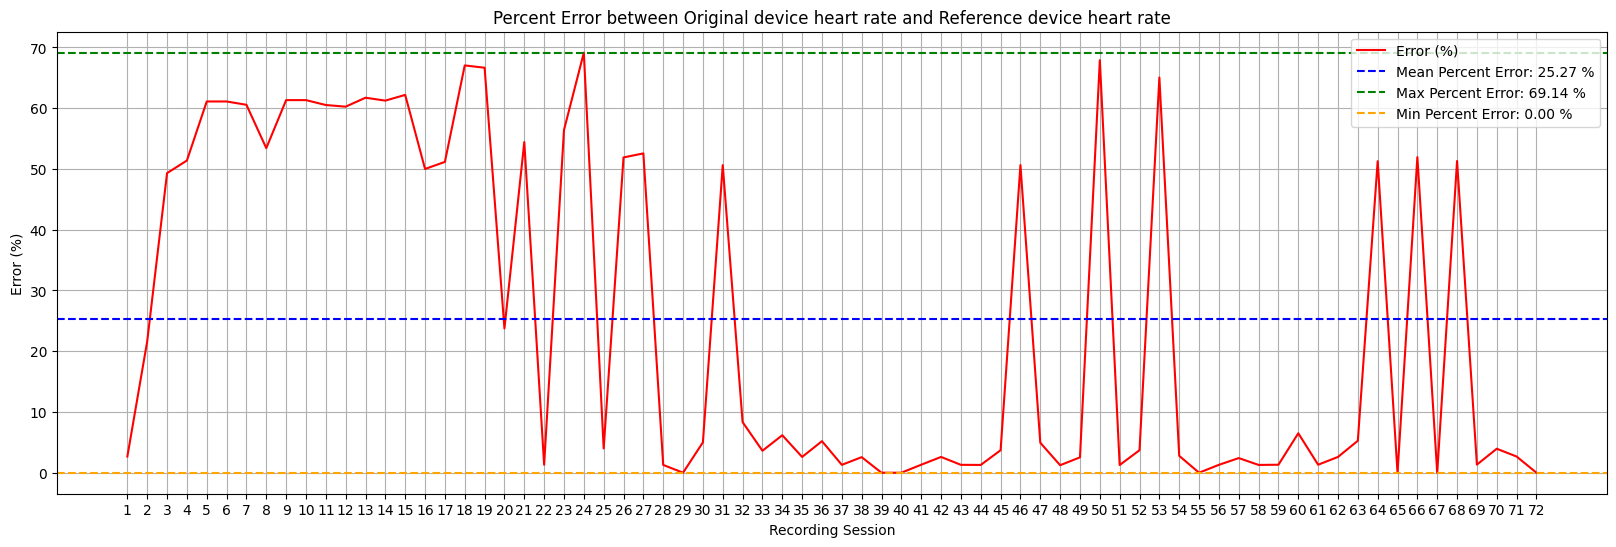

In [10]:
absolute_error = abs(original_device_heart_rate_column - reference_device_heart_rate_column)
mean_absolute_error = absolute_error.mean()
print(mean_absolute_error)

percent_error = (absolute_error / reference_device_heart_rate_column) * 100
print(percent_error)
mean_percent_error = percent_error.mean()
max_percent_error = percent_error.max()
min_percent_error = percent_error.min()

plt.figure(figsize = (20, 6))
plt.plot(percent_error, label = 'Error (%)', color = 'red')
plt.axhline(y = mean_percent_error, color = 'blue', linestyle='--', label = f'Mean Percent Error: {mean_percent_error:.2f} %')
plt.axhline(y = max_percent_error, color = 'green', linestyle='--', label = f'Max Percent Error: {max_percent_error:.2f} %')
plt.axhline(y = min_percent_error, color = 'orange', linestyle='--', label = f'Min Percent Error: {min_percent_error:.2f} %')
plt.title('Percent Error between Original device heart rate and Reference device heart rate')
plt.xlabel('Recording Session')
plt.ylabel('Error (%)')
plt.legend()
plt.grid()

num_sessions = len(original_device_heart_rate_column)
plt.xticks(ticks = np.arange(num_sessions), labels = np.arange(1, num_sessions + 1))

plt.show()